In [1]:
import requests

In [13]:
site = "https://query1.finance.yahoo.com/v7/finance/download/2330.TW?period1=0&period2=1549258857&interval=1d&events=history&crumb=hP2rOschxO0"
response = requests.post(site)
print(response.text)

Date,Open,High,Low,Close,Adj Close,Volume
2000-01-04,69.649002,69.649002,68.475197,69.649002,39.525471,200662321971
2000-01-05,69.649002,71.214104,68.866302,71.214104,40.413666,402466776297
2000-01-06,70.822899,71.214104,69.649002,69.649002,39.525471,197545701266
2000-01-07,67.301300,68.475197,66.518600,67.692497,38.415165,235270327441
2000-01-10,69.649002,70.431396,68.475197,70.040199,39.747475,276171665217
2000-01-11,70.822899,71.605202,68.475197,68.866302,39.081295,277769524211
2000-01-12,69.257500,70.822899,68.866302,70.822899,40.191654,216246790710
2000-01-13,70.822899,70.822899,69.649002,69.649002,39.525471,147490943364
2000-01-14,70.431396,72.387901,70.040199,71.214104,40.413666,288318943138
2000-01-17,74.344398,74.344398,73.170601,73.170601,41.523968,155256929295
2000-01-18,73.170601,73.170601,71.605202,71.996696,40.857780,131648021903
2000-01-19,71.996696,73.170601,71.605202,71.996696,40.857780,134848678139
2000-01-20,71.996696,71.996696,70.822899,71.214104,40.413666,125758111

In [14]:
with open('file.csv', 'w') as f:
    f.writelines(response.text)


In [18]:
import pandas as pd
df = pd.read_csv('file.csv', index_col='Date', parse_dates=['Date'])

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,69.649002,69.649002,68.475197,69.649002,39.525471,2.006623e+11
2000-01-05,69.649002,71.214104,68.866302,71.214104,40.413666,4.024668e+11
2000-01-06,70.822899,71.214104,69.649002,69.649002,39.525471,1.975457e+11
2000-01-07,67.301300,68.475197,66.518600,67.692497,38.415165,2.352703e+11
2000-01-10,69.649002,70.431396,68.475197,70.040199,39.747475,2.761717e+11


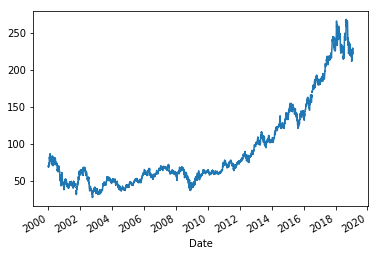

In [23]:
import matplotlib
%matplotlib inline
df.High.plot()


In [25]:

from io import StringIO
import numpy as np

datestr = '20190527'

# 下載股價
r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + datestr + '&type=ALL')

# 整理資料，變成表格
df = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '}) 
                                     for i in r.text.split('\n') 
                                     if len(i.split('",')) == 17 and i[0] != '='])), header=0)

In [7]:
df

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Unnamed: 16
0,1101,台泥,"10,885,298","3,654","462,183,001",42.35,42.65,42.25,42.35,NaN,0.00,42.35,70,42.40,197,10.13,NaN
1,1101B,台泥乙特,"53,141",7,"2,795,287",52.60,52.70,52.50,52.70,NaN,0.00,52.50,2,52.70,12,0.00,NaN
2,1102,亞泥,"8,696,694","4,192","381,543,364",44.00,44.30,43.70,43.75,-,0.15,43.75,47,43.85,8,12.12,NaN
3,1103,嘉泥,"2,615,580",813,"42,882,204",16.15,16.50,16.15,16.50,+,0.35,16.45,13,16.50,149,15.71,NaN
4,1104,環泥,"28,388",27,"549,054",19.30,19.40,19.25,19.40,+,0.10,19.30,11,19.40,20,10.49,NaN
5,1108,幸福,"59,000",15,"407,390",6.95,6.95,6.90,6.90,-,0.05,6.90,22,6.95,5,0.00,NaN
6,1109,信大,"878,685",449,"16,593,865",19.00,19.05,18.70,19.00,-,0.05,18.85,4,19.00,31,7.69,NaN
7,1110,東泥,"7,250",3,"117,425",16.20,16.20,16.20,16.20,NaN,0.00,16.10,1,16.20,19,115.71,NaN
8,1201,味全,"2,045,472",896,"56,450,241",27.50,27.90,27.25,27.70,+,0.30,27.70,3,27.75,26,7.07,NaN
9,1203,味王,"23,052",21,"604,862",26.20,26.35,26.15,26.30,-,0.05,26.15,7,26.35,3,13.08,NaN


In [2]:
import pandas_datareader as pdr
df_2330 = pdr.DataReader('2330.TW', 'yahoo')

In [14]:
startTime = '2018-12-28'

df_2330 = pdr.DataReader('2330.TW', 'yahoo', startTime)

In [16]:
df_2330.index


DatetimeIndex(['2019-04-02', '2019-04-03'], dtype='datetime64[ns]', name='Date', freq=None)

In [15]:
df_2330

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-28,225.5,222.5,223.5,225.5,29456773.0,216.605667
2019-01-02,226.5,219.0,226.5,219.5,32900482.0,210.842331
2019-01-03,218.0,214.0,214.0,215.5,34087620.0,207.000092
2019-01-04,211.5,206.5,211.5,208.0,65943521.0,199.795929
2019-01-07,214.0,211.0,212.0,213.0,35442176.0,204.598709
2019-01-08,212.5,210.0,212.0,211.0,22694481.0,202.677597
2019-01-09,216.5,211.0,212.0,215.5,46295446.0,207.000092
2019-01-10,216.5,214.5,216.0,216.0,20754593.0,207.480377
2019-01-11,220.5,218.0,219.0,220.5,28102288.0,211.802887


In [5]:

(a,b,c,d,e,f)=(df_2330.iloc[0,0],df_2330.iloc[0,1],df_2330.iloc[0,2],df_2330.iloc[0,3],df_2330.iloc[0,4],df_2330.iloc[0,5])




In [37]:
print(a,b,c,d,e,f)

249.5 246.0 249.5 246.0 24105053 236.29710388183594


In [30]:
df_2330.iloc[0]

High         2.495000e+02
Low          2.460000e+02
Open         2.495000e+02
Close        2.460000e+02
Volume       2.410505e+07
Adj Close    2.362971e+02
Name: 2019-04-02 00:00:00, dtype: float64

In [42]:
def getprice(h,l,o,c,v,adj):
        (h,l,o,c,v,adj)=(df_2330.iloc[0,0],df_2330.iloc[0,1],df_2330.iloc[0,2],df_2330.iloc[0,3],df_2330.iloc[0,4],df_2330.iloc[0,5])

In [8]:
a

249.5

In [6]:
type(a)

numpy.float64

In [7]:
int(a)

249

In [11]:
df_2330.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08',
               '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-18'],
              dtype='datetime64[ns]', name='Date', length=210, freq=None)